# Web Scrapping of Arrow (American TV Serie) scripts
## From the site: https://subslikescript.com/ 
## by: Anna Luiza Gomes

## Pre-processing the data (scripts)

In [3]:
# configuração para não exibir os warnings

import warnings
warnings.filterwarnings("ignore")

# ignorando future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

In [2]:
parser = 'html.parser'  # or 'lxml' (preferred) or 'html5lib', if installed
resp = urllib.request.urlopen("https://subslikescript.com/series/Arrow-2193021")    #missing 4 episodes from season 7 
soup = BeautifulSoup(resp, parser, from_encoding=resp.info().get_param('charset'))

for link in soup.find_all('a', href=True):
    
    print(link['href'])

/
/movies
/series
/
/series
/series/Arrow-2193021/season-1/episode-1-Pilot
/series/Arrow-2193021/season-1/episode-2-Honor_Thy_Father
/series/Arrow-2193021/season-1/episode-3-Lone_Gunmen
/series/Arrow-2193021/season-1/episode-4-An_Innocent_Man
/series/Arrow-2193021/season-1/episode-5-Damaged
/series/Arrow-2193021/season-1/episode-6-Legacies
/series/Arrow-2193021/season-1/episode-7-Muse_of_Fire
/series/Arrow-2193021/season-1/episode-8-Vendetta
/series/Arrow-2193021/season-1/episode-9-Years_End
/series/Arrow-2193021/season-1/episode-10-Burned
/series/Arrow-2193021/season-1/episode-11-Trust_But_Verify
/series/Arrow-2193021/season-1/episode-12-Vertigo
/series/Arrow-2193021/season-1/episode-13-Betrayal
/series/Arrow-2193021/season-1/episode-14-The_Odyssey
/series/Arrow-2193021/season-1/episode-15-Dodger
/series/Arrow-2193021/season-1/episode-16-Dead_to_Rights
/series/Arrow-2193021/season-1/episode-17-The_Huntress_Returns
/series/Arrow-2193021/season-1/episode-18-Salvation
/series/Arrow-21930

In [4]:
href_tags = soup.find_all('a',href=True)   
hrefs = [tag.get('href') for tag in href_tags]

In [5]:
for count, value in enumerate(hrefs):
     print(count, value)

0 /
1 /movies
2 /series
3 /
4 /series
5 /series/Arrow-2193021/season-1/episode-1-Pilot
6 /series/Arrow-2193021/season-1/episode-2-Honor_Thy_Father
7 /series/Arrow-2193021/season-1/episode-3-Lone_Gunmen
8 /series/Arrow-2193021/season-1/episode-4-An_Innocent_Man
9 /series/Arrow-2193021/season-1/episode-5-Damaged
10 /series/Arrow-2193021/season-1/episode-6-Legacies
11 /series/Arrow-2193021/season-1/episode-7-Muse_of_Fire
12 /series/Arrow-2193021/season-1/episode-8-Vendetta
13 /series/Arrow-2193021/season-1/episode-9-Years_End
14 /series/Arrow-2193021/season-1/episode-10-Burned
15 /series/Arrow-2193021/season-1/episode-11-Trust_But_Verify
16 /series/Arrow-2193021/season-1/episode-12-Vertigo
17 /series/Arrow-2193021/season-1/episode-13-Betrayal
18 /series/Arrow-2193021/season-1/episode-14-The_Odyssey
19 /series/Arrow-2193021/season-1/episode-15-Dodger
20 /series/Arrow-2193021/season-1/episode-16-Dead_to_Rights
21 /series/Arrow-2193021/season-1/episode-17-The_Huntress_Returns
22 /series/Arro

In [6]:
hrefs[170] #the last with episode name

'/series/Arrow-2193021/season-8/episode-10-Fadeout'

In [7]:
len(hrefs)

172

## List with the episode's names

In [8]:
lista=[]   #list with the episode's names

for i in range(5,171):
    lista.append(hrefs[i])
      

In [9]:
lista[0]  #first episode

'/series/Arrow-2193021/season-1/episode-1-Pilot'

In [10]:
lista[165] #last episode

'/series/Arrow-2193021/season-8/episode-10-Fadeout'

In [11]:
lista[40]   #episode in portuguese

'/series/Arrow-2193021/season-2/episode-18-Deathstroke'

In [12]:
len(lista)        #its missing 4 episodes from : season 7 (12,13,14) and season 3 (episode 4)

166

In [13]:
df_lista = pd.DataFrame(lista) #puting the episode's name in a list

In [14]:
df_lista.head()

,0
0,/series/Arrow-2193021/season-1/episode-1-Pilot
1,/series/Arrow-2193021/season-1/episode-2-Honor...
2,/series/Arrow-2193021/season-1/episode-3-Lone_...
3,/series/Arrow-2193021/season-1/episode-4-An_In...
4,/series/Arrow-2193021/season-1/episode-5-Damaged


## List with the scripts

In [15]:
eps = []    #list with the scripts

for i in  range(5,171):
  url_base= 'https://subslikescript.com'
  url_final = url_base + hrefs[i]
  page = requests.get(url_final)
  soup = BeautifulSoup(page.content, "lxml")
  results = soup.find_all("div", {"class": "full-script"})
  eps.append(results)


In [16]:
len(eps)

166

In [17]:
type(eps)

list

In [18]:
chars = ['<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n      \r\n</script> ','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n      \r\n</script> ','OpenSubtitles recommends using Nord VPN from 3.49 USD/month ----&gt; osdb.link/vpn ','Greg, move your head!','OpenSubtitles recommends using Nord VPN from 3.49 USD/month ----&gt; osdb.link/vpn','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n      \r\n</script>','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n      \r\n</script>','(adsbygoogle = window.adsbygoogle || []).push({});','[<div class="full-script">','<br/><br/>','<br/>', '</div>]','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript square adaptive -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="auto" data-ad-slot="8838522786" data-full-width-responsive="true" style="display:block"></ins>\n<script>\r\n     \r\n</script>','<script async="" src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js"></script>\n<!-- subslikescript native automated \'subslikescript article\' -->\n<ins class="adsbygoogle" data-ad-client="ca-pub-6250492176235895" data-ad-format="fluid" data-ad-layout="in-article" data-ad-slot="8633658590" style="display:block; text-align:center;"></ins>\n<script>\r\n     \r\n</script>', 'OLIVER:My name is Oliver Queen.For five years, I was strandedon an island with only one goal:Survive.Oliver Queen is alive.OLIVER:Now, I will fulfill my father\'s dying wish......to use the list of names he left me......and bring down thosewho are poisoning my city.To do this,I must become someone else.I must become something else.','My name is Oliver Queen.After five years in hell,I have come home with only one goal:To save my city.Now others have joined my crusade.To them, I\'m Oliver Queen.To the rest of Starling City......I am someone else.I am something else.']

In [19]:
txt=[]
for i in range(len(eps)):
  txt.append(str(eps[i]))
  for c in chars:
    txt[i] = txt[i].replace(c,'')
    txt[i] = txt[i].replace('1','I')
    txt[i] = txt[i].replace('\\','') #does not work!

In [20]:
len(txt)

166

In [21]:
# txt[40]   # in portuguese...

## Creating the dataframe with the scripts

In [22]:
df_ep = pd.DataFrame(txt,columns=['Episodios'])

In [23]:
df_ep.shape

(166, 1)

In [24]:
df_ep.head()

,Episodios
0,The name of the islandthey found me on is Lian...
1,[PANTING][GRUNTS][SPEAKING IN FOREIGN LANGUAGE...
2,"My name is Oliver Queen.To my family, I am the..."
3,"My name is Oliver Queen.For 5 years, I was str..."
4,"OLIVER:My name is Oliver Queen.For five years,..."


In [25]:
# Removing punctuation
df_ep['text_processed'] = \
df_ep['Episodios'].map(lambda x: re.sub('[,\.!?]', ' ', x))

In [26]:
# Convert the titles to lowercase
df_ep['text_processed'] = \
df_ep['text_processed'].map(lambda x: x.lower())     

In [27]:
df_ep['text_processed'].head()

0    the name of the islandthey found me on is lian...
1    [panting][grunts][speaking in foreign language...
2    my name is oliver queen to my family  i am the...
3    my name is oliver queen for 5 years  i was str...
4    oliver:my name is oliver queen for five years ...
Name: text_processed, dtype: object

## First dataset with the raw script, the processed script and the episode name


In [28]:
df_parcial = pd.concat([df_lista, df_ep], axis=1) 

In [29]:
df_parcial.columns = ['nome_ep', 'Episodios','text_processed']

In [30]:
df_parcial = df_parcial.drop(df_parcial.index[[40]]) #removing line 40

In [31]:
df_parcial = df_parcial.reset_index(drop=True)  #reseting the index

In [32]:
df_parcial.tail()

,nome_ep,Episodios,text_processed
160,/series/Arrow-2193021/season-8/episode-6-Reset,"PREVIOUSLY ON ""ARROW""...THIS PLACE LOOKSEXACTL...","previously on ""arrow"" this place looksexactl..."
161,/series/Arrow-2193021/season-8/episode-7-Purga...,"Previously on ""Arrow""...-I need your help, roy...","previously on ""arrow"" -i need your help roy..."
162,/series/Arrow-2193021/season-8/episode-8-Crisi...,Previously on Crisison Infinite Earths...There...,previously on crisison infinite earths there...
163,/series/Arrow-2193021/season-8/episode-9-Green...,bianca!bianca bertinelli?who the hell are you...,bianca bianca bertinelli who the hell are you...
164,/series/Arrow-2193021/season-8/episode-10-Fadeout,[Oliver]My name is Oliver Queen.[gunshot][Oliv...,[oliver]my name is oliver queen [gunshot][oliv...


In [33]:
df_parcial.shape

(165, 3)

In [34]:
df_parcial.isnull().sum()

nome_ep           0
Episodios         0
text_processed    0
dtype: int64

----------------------------------------------------------------------------

# Wordcloud

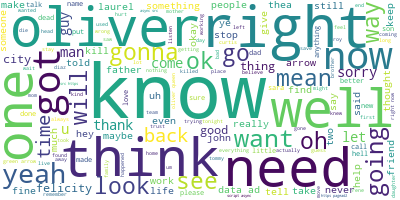

In [37]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed texts together.
long_string = ','.join(list(df_parcial['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [38]:
# df_parcial['text_processed'].values #todo o dataset

# Tokenization and remotion of stopwords (english) 

In [41]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject','still','work','yes','life','sure','told','said','even','people','year','city','okay','never','good','sorry', 'wa','thought','say','find','mr','uh','two','ha','guy','thing','re','queen','something','thank','maybe','edu','arrow','really', 'look', 'tell', 'mean', 'make','way','see','take',  'use','time','man','data', 'ad', 'would', 'think','script', 'could' ,'like','want', 'come',  'one', 'yeah', 'get','go','got','right','know','gonna','need','oh','well','ok','let','back','going','hey'])
print(stopwords.words() [620:680])




[nltk_data] Downloading package stopwords to /home/anna/nltk_data...


['your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at']


[nltk_data]   Unzipping corpora/stopwords.zip.


In [46]:
lemmatizer = WordNetLemmatizer()

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def Lemmatize(list1):
    lemma_list_of_words = []
    for i in range(len(list1)):
        l1 = list1[i]
        l2 = ' '.join([lemmatizer.lemmatize(word) for word in l1])
        lemma_list_of_words.append(l2)
        lemma_list_of_words[i] = re.sub("[^\w]", " ",  str(lemma_list_of_words[i])).split()
        
    return lemma_list_of_words



data = df_parcial.text_processed.values.tolist()   
data_words = list(sent_to_words(data))
data_words = Lemmatize(data_words)

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30]) 

['name', 'islandthey', 'found', 'lian', 'yu', 'mandarin', 'purgatory', 'stranded', 'five', 'dreamt', 'rescueevery', 'cold', 'black', 'night', 'since', 'five', 'goal', 'survive', 'survive', 'day', 'return', 'home', 'island', 'held', 'many', 'danger', 'live', 'myselfmore', 'forge', 'weapon']


In [47]:
data_words[0]

['name',
 'islandthey',
 'found',
 'lian',
 'yu',
 'mandarin',
 'purgatory',
 'stranded',
 'five',
 'dreamt',
 'rescueevery',
 'cold',
 'black',
 'night',
 'since',
 'five',
 'goal',
 'survive',
 'survive',
 'day',
 'return',
 'home',
 'island',
 'held',
 'many',
 'danger',
 'live',
 'myselfmore',
 'forge',
 'weapon',
 'returning',
 'boy',
 'shipwrecked',
 'async',
 'src',
 'http',
 'pagead',
 'com',
 'pagead',
 'adsbygoogle',
 'subslikescript',
 'native',
 'automated',
 'subslikescript',
 'article',
 'class',
 'adsbygoogle',
 'client',
 'ca',
 'pub',
 'format',
 'fluid',
 'layout',
 'article',
 'slot',
 'style',
 'display',
 'block',
 'text',
 'align',
 'center',
 'bring',
 'justiceto',
 'poisoned',
 'name',
 'oliver',
 'oliver',
 'alive',
 'starling',
 'residentwas',
 'found',
 'fisherman',
 'north',
 'china',
 'seafive',
 'day',
 'ago',
 'five',
 'waspresumed',
 'dead',
 'following',
 'accident',
 'sea',
 'whichclaimed',
 'gambit',
 'atabloid',
 'presence',
 'fixture',
 'club',
 'sc

In [48]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])


[(0, 3), (1, 2), (2, 1), (3, 2), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 5), (16, 1), (17, 4), (18, 2), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 4), (26, 1), (27, 1), (28, 1), (29, 4)]


# Model training

In [49]:
from pprint import pprint

# number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"oliver" + 0.004*"felicity" + 0.003*"thea" + 0.003*"help" + '
  '0.003*"john" + 0.003*"laurel" + 0.003*"father" + 0.002*"friend" + '
  '0.002*"please" + 0.002*"much"'),
 (1,
  '0.007*"oliver" + 0.003*"felicity" + 0.003*"thea" + 0.003*"help" + '
  '0.002*"kill" + 0.002*"laurel" + 0.002*"friend" + 0.002*"father" + '
  '0.002*"last" + 0.002*"someone"'),
 (2,
  '0.009*"oliver" + 0.004*"laurel" + 0.004*"felicity" + 0.003*"help" + '
  '0.002*"father" + 0.002*"thea" + 0.002*"last" + 0.002*"give" + 0.002*"stop" '
  '+ 0.002*"friend"')]


In [52]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
import os


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('Data/prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'Data/prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.001148  0.001857       1        1  16.561093
1     -0.001872 -0.001582       2        1  17.774931
2      0.003020 -0.000275       3        1  65.663976, topic_info=             Term         Freq        Total Category  logprob  loglift
484        oliver  2558.000000  2558.000000  Default  30.0000  30.0000
1525     felicity  1005.000000  1005.000000  Default  29.0000  29.0000
2949         thea   742.000000   742.000000  Default  28.0000  28.0000
376          john   599.000000   599.000000  Default  27.0000  27.0000
242        father   721.000000   721.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2949         thea   459.828296   742.711970   Topic3  -6.0317  -0.0588
254          fine   346.845600   517.751204   Topic3  -6.3137   0.0200
376          john   374.645008   599.108961   Topic3  -6.2366  -0.0488
17    adsbygoogle   337.187052   515.315389   Topic3  -6.3419  -0.0035
83         better   333.338741   506.233453   Topic3  -6.3534   0.0028

[306 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
24774      3  0.753713  absolutelyno
8656       1  0.478579  acknowledged
8656       2  0.478579  acknowledged
8656       3  0.478579  acknowledged
3274       1  0.152416      actually
...      ...       ...           ...
11010      2  0.246963            za
11010      3  0.493926            za
11082      1  0.345494          znam
11082      2  0.345494          znam
11082      3  0.345494          znam

[628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

## Topicos

1 - 
2 - 
3 - 

In [53]:
topic_scores = [[topic_score[1] for topic_score in sent] for sent in doc_lda]


/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
# Topics


# [(0,
#   '0.009*"oliver" + 0.004*"felicity" + 0.003*"thea" + 0.003*"help" + '
#   '0.003*"john" + 0.003*"laurel" + 0.003*"father" + 0.002*"friend" + '
#   '0.002*"please" + 0.002*"much"'),  -> more romantic episode? lover on second place
#  (1,
#   '0.007*"oliver" + 0.003*"felicity" + 0.003*"thea" + 0.003*"help" + '
#   '0.002*"kill" + 0.002*"laurel" + 0.002*"friend" + 0.002*"father" + '
#   '0.002*"last" + 0.002*"someone"'), -> a more generic episode (action,family,lovers,etc)
#  (2,
#   '0.009*"oliver" + 0.004*"laurel" + 0.004*"felicity" + 0.003*"help" + '
#   '0.002*"father" + 0.002*"thea" + 0.002*"last" + 0.002*"give" + 0.002*"stop" '
#   '+ 0.002*"friend"')] -> possible a family episode (sister,lovers,father)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


-----------------------------------------------------------------------------------------------------------

# Dataframe with scores of each topic, where each line is the index of txt (script of the episode)


In [55]:
df_topics = pd.DataFrame(topic_scores)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
len(df_topics)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


165

In [57]:
df_topics.tail()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2
160,0.999569,NaN,NaN
161,0.661472,0.121092,0.217435
162,0.021154,0.167041,0.811806
163,0.040381,0.959077,NaN
164,0.195369,0.296078,0.508553


In [58]:
df_topics.fillna(0,  inplace=True)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
df_topics.loc[4,:]   #scores dos topicos do script 4 

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    0.067190
1    0.908645
2    0.024165
Name: 4, dtype: float64

# Dataframe concat
## Concatenating the dataset with the raw script, the processed script and the episode name (df_parcial) with Dataframe with scores of each topic (df_topics)

In [60]:
df_concat = pd.concat([df_parcial, df_topics], axis=1) 

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
df_concat.tail()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nome_ep,Episodios,text_processed,0,1,2
160,/series/Arrow-2193021/season-8/episode-6-Reset,"PREVIOUSLY ON ""ARROW""...THIS PLACE LOOKSEXACTL...","previously on ""arrow"" this place looksexactl...",0.999569,0.000000,0.000000
161,/series/Arrow-2193021/season-8/episode-7-Purga...,"Previously on ""Arrow""...-I need your help, roy...","previously on ""arrow"" -i need your help roy...",0.661472,0.121092,0.217435
162,/series/Arrow-2193021/season-8/episode-8-Crisi...,Previously on Crisison Infinite Earths...There...,previously on crisison infinite earths there...,0.021154,0.167041,0.811806
163,/series/Arrow-2193021/season-8/episode-9-Green...,bianca!bianca bertinelli?who the hell are you...,bianca bianca bertinelli who the hell are you...,0.040381,0.959077,0.000000
164,/series/Arrow-2193021/season-8/episode-10-Fadeout,[Oliver]My name is Oliver Queen.[gunshot][Oliv...,[oliver]my name is oliver queen [gunshot][oliv...,0.195369,0.296078,0.508553


In [302]:
# df_concat2.to_csv('scripts1.csv',  sep=';')

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Dataset with ratings and amount of ratings
## manually generated from the IMDb page ( https://www.imdb.com/title/tt2193021/episodes?ref_=tt_eps_sm )

In [62]:
ratings = pd.read_csv('Data/ratings2.csv', sep=",")

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
ratings.head()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,episodios,nota_imdb,qtd_reviews
0,/series/Arrow-2193021/season-1/episode-1-Pilot,8.5,7572
1,/series/Arrow-2193021/season-1/episode-2-Honor...,8.2,5731
2,/series/Arrow-2193021/season-1/episode-3-Lone_...,8.4,5367
3,/series/Arrow-2193021/season-1/episode-4-An_In...,8.3,5071
4,/series/Arrow-2193021/season-1/episode-5-Damaged,8.6,5011


In [64]:
ratings.isnull().sum()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


episodios      0
nota_imdb      0
qtd_reviews    0
dtype: int64

In [65]:
ratings.shape

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(165, 3)

# Final dataset
## Dataset with the episode name, the script, the script processed , column with score value of topic 0, column with score value of topic 1, column with score value of topic 2, the imdb rating, the amount of reviews and the predominant topic 

In [66]:
dataset = pd.concat([df_concat, ratings], axis=1) 

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
dataset.drop('episodios', axis=1, inplace=True)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
topicos = dataset.loc[:, [0, 1, 2]]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
dataset.loc[:, [0, 1, 2]]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2
0,0.015196,0.191026,0.793778
1,0.014313,0.947105,0.038582
2,0.049773,0.876113,0.074114
3,0.110172,0.204996,0.684832
4,0.067190,0.908645,0.024165
...,...,...,...
160,0.999569,0.000000,0.000000
161,0.661472,0.121092,0.217435
162,0.021154,0.167041,0.811806
163,0.040381,0.959077,0.000000


In [70]:
dataset['Topic'] = topicos.idxmax(axis=1)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
dataset.head()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,nome_ep,Episodios,text_processed,0,1,2,nota_imdb,qtd_reviews,Topic
0,/series/Arrow-2193021/season-1/episode-1-Pilot,The name of the islandthey found me on is Lian...,the name of the islandthey found me on is lian...,0.015196,0.191026,0.793778,8.5,7572,2
1,/series/Arrow-2193021/season-1/episode-2-Honor...,[PANTING][GRUNTS][SPEAKING IN FOREIGN LANGUAGE...,[panting][grunts][speaking in foreign language...,0.014313,0.947105,0.038582,8.2,5731,1
2,/series/Arrow-2193021/season-1/episode-3-Lone_...,"My name is Oliver Queen.To my family, I am the...",my name is oliver queen to my family i am the...,0.049773,0.876113,0.074114,8.4,5367,1
3,/series/Arrow-2193021/season-1/episode-4-An_In...,"My name is Oliver Queen.For 5 years, I was str...",my name is oliver queen for 5 years i was str...,0.110172,0.204996,0.684832,8.3,5071,2
4,/series/Arrow-2193021/season-1/episode-5-Damaged,"OLIVER:My name is Oliver Queen.For five years,...",oliver:my name is oliver queen for five years ...,0.067190,0.908645,0.024165,8.6,5011,1


In [72]:
dataset.shape

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(165, 9)

In [74]:
#dataset.to_csv('Data/scripts.csv',  sep=';')

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
